In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
import joblib
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from scipy.stats import zscore

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('Doctorfee_Train.xlsx')

In [3]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [4]:
df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [5]:
df['Miscellaneous_Info']

0                    100% 16 Feedback Kakkanad, Ernakulam
1                   98% 76 Feedback Whitefield, Bangalore
2                                                     NaN
3       Bannerghatta Road, Bangalore ₹250 Available on...
4                   100% 4 Feedback Keelkattalai, Chennai
                              ...                        
5956              98% 45 Feedback Basavanagudi, Bangalore
5957                                                  NaN
5958        97% 11 Feedback Greater Kailash Part 2, Delhi
5959    General Medical Consultation Viral Fever Treat...
5960    Acrylic Partial Denture Crowns and Bridges Fix...
Name: Miscellaneous_Info, Length: 5961, dtype: object

In [6]:
df['Qualification'].unique()

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ...,
       'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery',
       'BDS, certification in smile designing',
       'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)'],
      dtype=object)

In [7]:
df['Profile'].unique()

array(['Homeopath', 'Ayurveda', 'ENT Specialist', 'Dentist',
       'General Medicine', 'Dermatologists'], dtype=object)

In [8]:
df['Fees'].unique()


array([100, 350, 300, 250, 200, 700, 500, 400, 150, 650, 600,  50, 800,
       750, 450,  80,  60, 550, 900, 950, 430, 130, 630, 499, 260,  70,
        10, 299, 230, 380,   5, 280,  40,  30, 180, 920, 125, 850,  20,
       220], dtype=int64)

In [9]:
#split the experience string to get the first chars

df['Experience']=df['Experience'].str.split(' years experience').map(lambda x: x[0])

In [10]:
#Extracting the places 
location=df['Place'].str.rsplit(',',1,expand=True)

In [11]:
#Extract the area and city info from place
df['Area']=location[0]
df['City']=location[1]

In [12]:
df.drop(['Place'],axis=1,inplace=True)

In [13]:
df['Area']

0                     Kakkanad
1                   Whitefield
2              Mathikere - BEL
3            Bannerghatta Road
4                 Keelkattalai
                 ...          
5956              Basavanagudi
5957              Nungambakkam
5958    Greater Kailash Part 2
5959            Vileparle West
5960                 Pitampura
Name: Area, Length: 5961, dtype: object

In [14]:
#Extracting years of experience

df['exp_yrs']=df['Experience'].str.slice(stop=2).astype(int)

In [15]:
df.describe()

,Fees,exp_yrs
count,5961.000000,5961.000000
mean,307.944640,17.303976
std,190.920373,11.142798
min,5.000000,0.000000
25%,150.000000,9.000000
50%,300.000000,14.000000
75%,500.000000,23.000000
max,950.000000,66.000000


In [16]:
#Extracting the qualifications by splitting the string present in the qualifications column (row wise)

df['Qlf1']=df['Qualification'].str.split(',').str[0]
df['Qlf2']=df['Qualification'].str.split(',').str[1]
df['Qlf3']=df['Qualification'].str.split(',').str[2]

In [17]:
df['City'].unique()

array([' Ernakulam', ' Bangalore', ' Chennai', ' Delhi', ' Hyderabad',
       ' Coimbatore', ' Mumbai', ' Thiruvananthapuram', nan, None],
      dtype=object)

In [18]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Profile                  0
Miscellaneous_Info    2620
Fees                     0
Area                    25
City                    26
exp_yrs                  0
Qlf1                     0
Qlf2                  1962
Qlf3                  4590
dtype: int64

There are null values present in multiple columns

In [19]:
#Filling all the null values 
df['Qlf1'].fillna('not given',inplace=True)
df['Qlf2'].fillna('not given',inplace=True)
df['Qlf3'].fillna('not given',inplace=True)
df['City'].fillna('not given',inplace=True)
df['Area'].fillna('not given',inplace=True)
df['Rating'].fillna('0%',inplace=True)
df['Rating']=df['Rating'].str.slice(stop=-1).astype(int)

In [20]:
df.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,Area,City,exp_yrs,Qlf1,Qlf2,Qlf3
0,"BHMS, MD - Homeopathy",24,100,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam,24,BHMS,MD - Homeopathy,not given
1,"BAMS, MD - Ayurveda Medicine",12,98,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore,12,BAMS,MD - Ayurveda Medicine,not given
2,"MBBS, MS - Otorhinolaryngology",9,0,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore,9,MBBS,MS - Otorhinolaryngology,not given
3,"BSc - Zoology, BAMS",12,0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore,12,BSc - Zoology,BAMS,not given
4,BAMS,20,100,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai,20,BAMS,not given,not given


In [21]:
df['Qlf3'].value_counts()

not given                                                4590
 Venereology & Leprosy                                    185
 MBBS                                                     114
 DNB - ENT                                                 68
 DNB - Dermatology & Venereology                           35
                                                         ... 
 MPH                                                        1
 Member of Royal College of Emergency Medicine(MRCEM)       1
 M.Sc. Yoga and Naturopathy                                 1
 MDS - Periodontics                                         1
 DVL                                                        1
Name: Qlf3, Length: 407, dtype: int64

In [22]:
df['Profile'].unique()

array(['Homeopath', 'Ayurveda', 'ENT Specialist', 'Dentist',
       'General Medicine', 'Dermatologists'], dtype=object)

In [23]:
df['Qlf1'].unique()

array(['BHMS', 'BAMS', 'MBBS', 'BSc - Zoology', 'BDS', 'BSc', 'MDS',
       'Diploma in Dermatology', 'DM - Neurology', 'MD - Homeopathy',
       'MDS - Prosthodontist And Crown Bridge',
       'MDS - Oral & Maxillofacial Surgery',
       'MDS - Periodontology and Oral Implantology', 'MD - Dermatology',
       'MDS-Oral Pathology and Oral Microbiology', 'MD - Dermatology ',
       'Get inspired by remarkable stories of people like you',
       'PhD - Orthodontics & Dentofacial Orthopaedics', 'MRCPS',
       'MDS - Conservative Dentistry & Endodontics',
       'MD - Ayurveda Medicine', 'MS - General Surgery', 'DDVL',
       'MD - General Medicine',
       'DHMS (Diploma in Homeopathic Medicine and Surgery)', 'MS - ENT',
       'MD - Internal Medicine', 'GCEH', 'MS - Otorhinolaryngology',
       'Post Graduate Diploma in Healthcare Management(PGDHM)',
       'DNB - Paediatrics', 'Certification in Aesthetic Dentistry',
       'Fellowship In Laryngology Bronchoesophagology', 'FAGE',
      

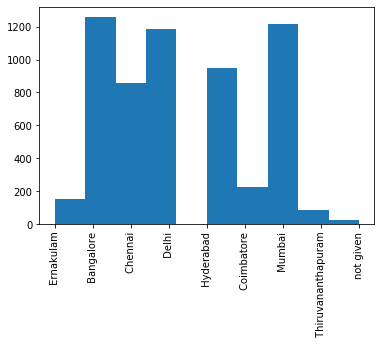

In [24]:
#EDA

plt.hist('City',data=df)
plt.xticks(rotation=90)
plt.show()

In [25]:
#Encoding the features using label encoder
from sklearn.preprocessing import LabelEncoder

le_City=LabelEncoder()
df['Citycode']=le_City.fit_transform(df['City'])

le_Area=LabelEncoder()
df['Areacode']=le_Area.fit_transform(df['Area'])

le_Qlf1=LabelEncoder()
df['Q1code']=le_Qlf1.fit_transform(df['Qlf1'])
x=df.loc[df['Qlf1']=='Get inspired by remarkable stories of people like you','Q1code']

le_Qlf2=LabelEncoder()
df['Q2code']=le_Qlf2.fit_transform(df['Qlf2'])

le_Qlf3=LabelEncoder()
df['Q3code']=le_Qlf3.fit_transform(df['Qlf3'])

le_Profile=LabelEncoder()
df['Prcode']=le_Profile.fit_transform(df['Profile'])


In [26]:
#Lets check the encoded columns
df.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,Area,City,exp_yrs,Qlf1,Qlf2,Qlf3,Citycode,Areacode,Q1code,Q2code,Q3code,Prcode
0,"BHMS, MD - Homeopathy",24,100,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam,24,BHMS,MD - Homeopathy,not given,4,297,8,252,406,5
1,"BAMS, MD - Ayurveda Medicine",12,98,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore,12,BAMS,MD - Ayurveda Medicine,not given,0,856,5,241,406,0
2,"MBBS, MS - Otorhinolaryngology",9,0,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore,9,MBBS,MS - Otorhinolaryngology,not given,0,453,79,334,406,3
3,"BSc - Zoology, BAMS",12,0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore,12,BSc - Zoology,BAMS,not given,0,68,12,7,406,0
4,BAMS,20,100,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai,20,BAMS,not given,not given,1,336,5,426,406,0


In [27]:
df2=df.copy()

In [29]:
df=df.drop(['Area','City','Miscellaneous_Info','Profile','Qualification','Qlf1','Qlf2','Qlf3'],axis=1)

In [30]:
df.head()

,Experience,Rating,Fees,exp_yrs,Citycode,Areacode,Q1code,Q2code,Q3code,Prcode
0,24,100,100,24,4,297,8,252,406,5
1,12,98,350,12,0,856,5,241,406,0
2,9,0,300,9,0,453,79,334,406,3
3,12,0,250,12,0,68,12,7,406,0
4,20,100,250,20,1,336,5,426,406,0


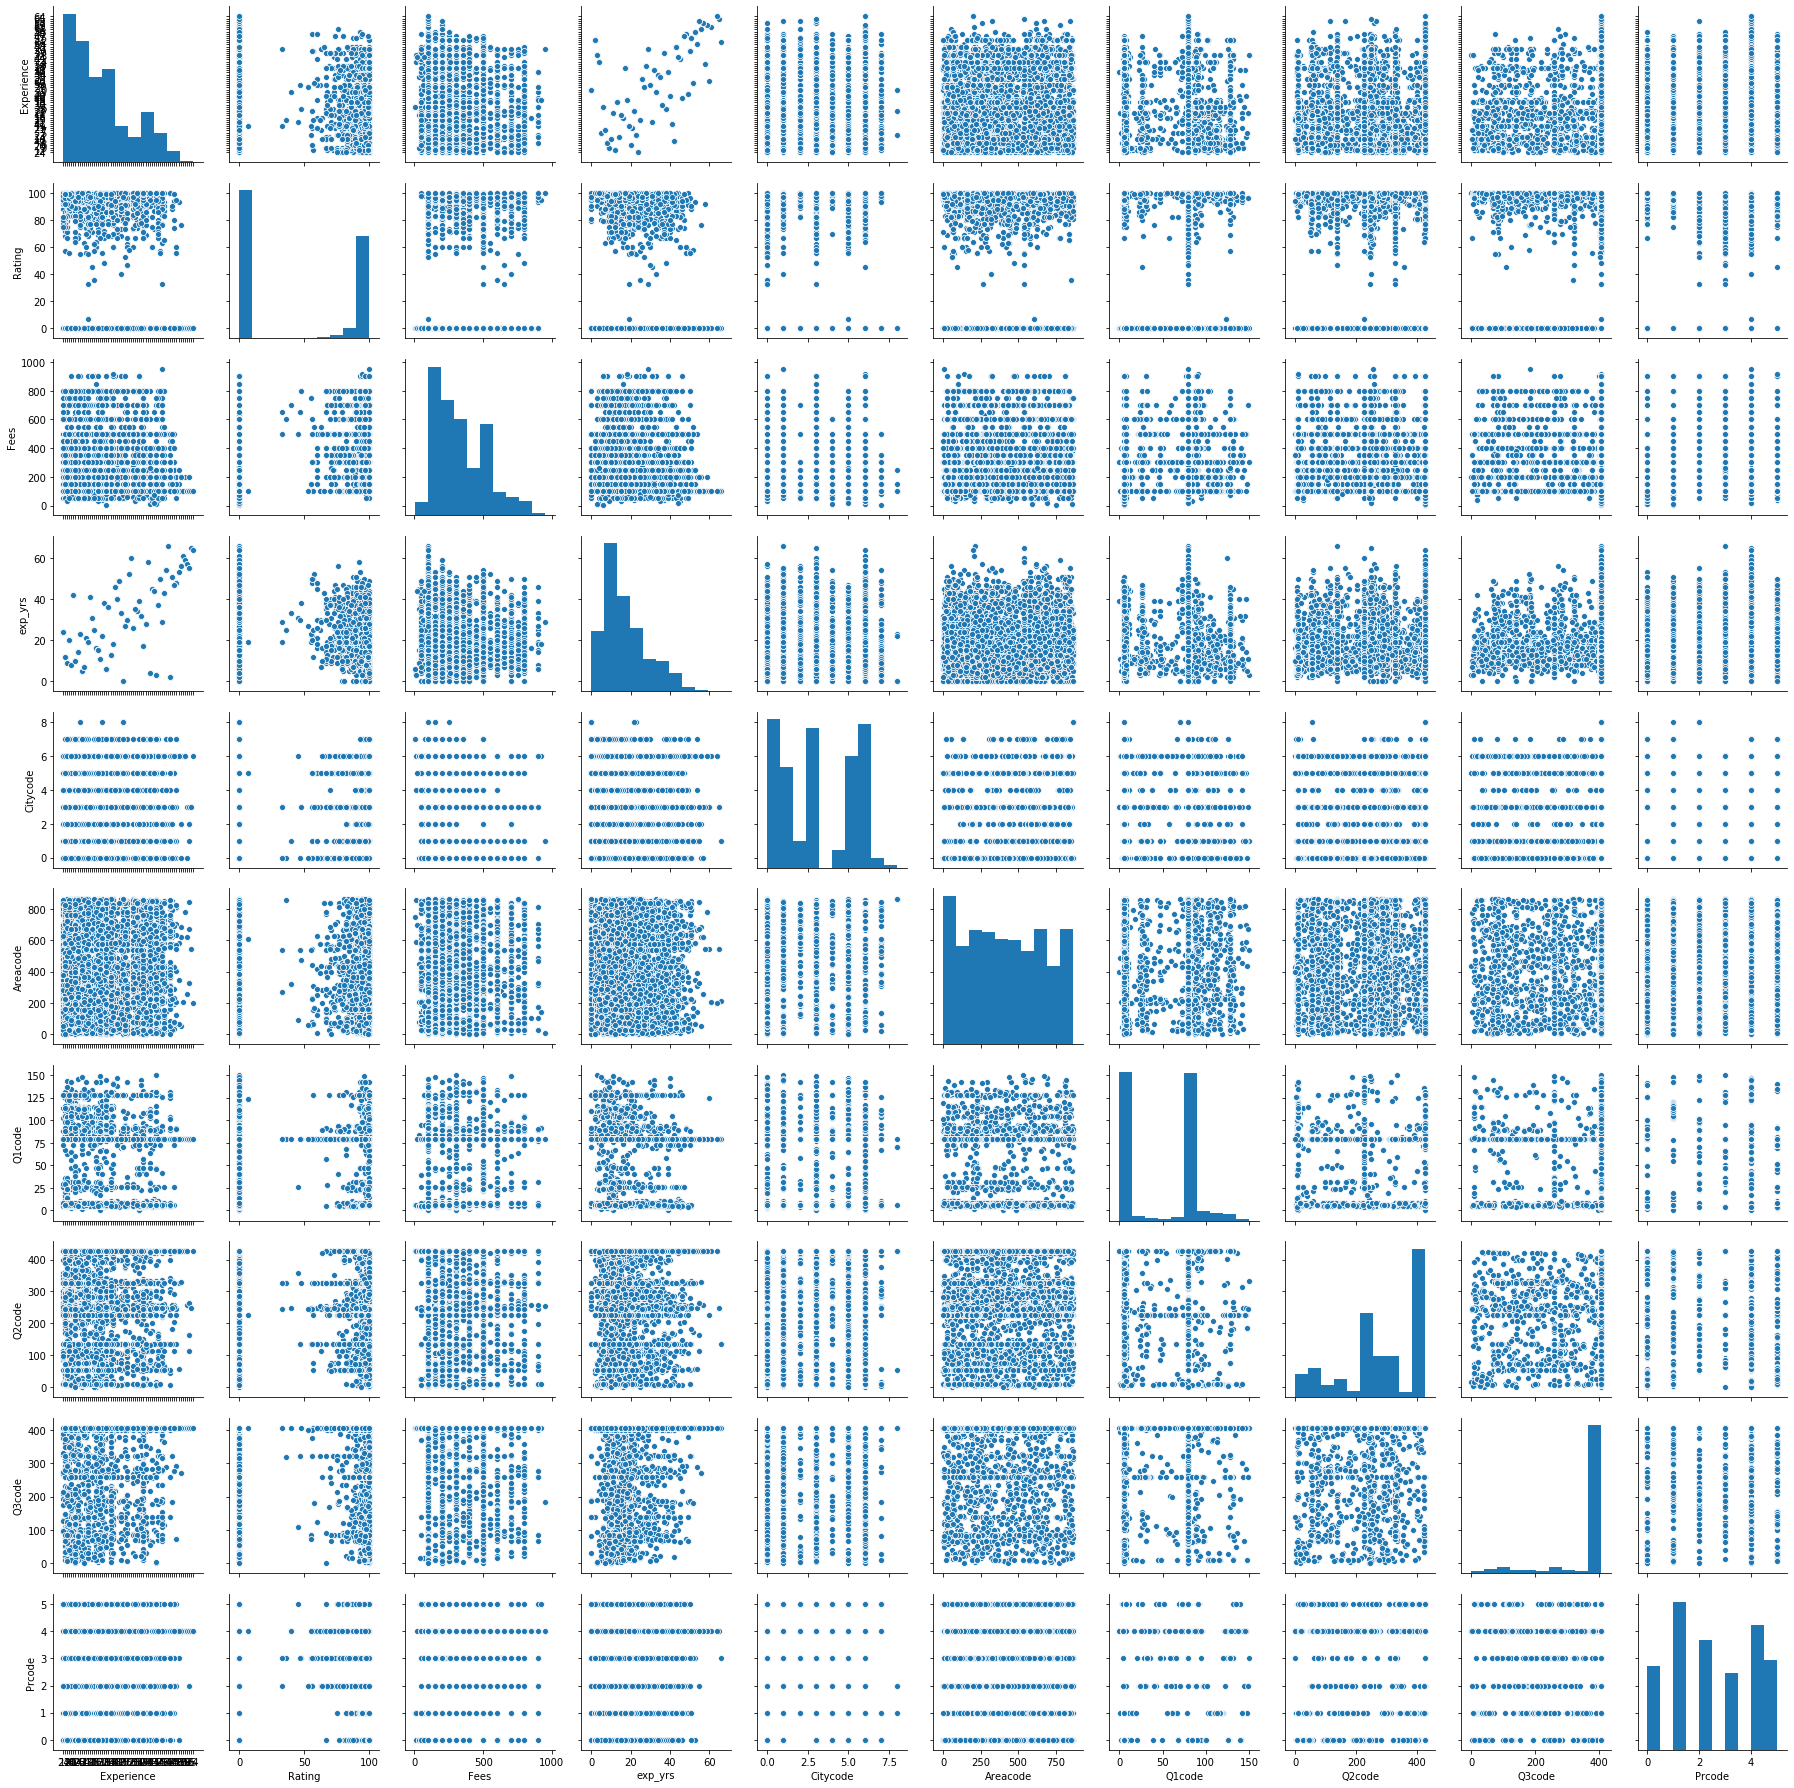

In [31]:
sbn.pairplot(df)

In [32]:
x=df.drop('Fees',axis=1)

In [33]:
y=df['Fees']

In [34]:
#Scaling the features to a common scale
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)


In [35]:
def r2score(model,x,y):
    max_acc=0
    for rst in range(40,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=rst,test_size=.22)
        model.fit(x_train,y_train)
        predy=model.predict(x_test)
        acc=r2_score(y_test,predy)
        print('Accuracy is',acc,'for the random state',rst)
        if acc>max_acc:
            max_acc=acc
            f_rst=rst
    print('Maximum r2score is ',max_acc,'and acquired at',f_rst)
    return f_rst

In [36]:
dtr=DecisionTreeRegressor()
params={'criterion': ['mse'],
 'max_depth': [None],
 'max_features': [None],
 'max_leaf_nodes': [4,8,16],
 'min_impurity_decrease': [0.0],
 'min_impurity_split': [None],
 'min_samples_leaf': [1,2,4],
 'min_samples_split': [2,4],
 'min_weight_fraction_leaf': [0.0],
 'presort': [False],
 'random_state': [None],
 'splitter': ['best']}


In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=45)
from sklearn.model_selection import GridSearchCV
gcv=GridSearchCV(estimator=dtr,param_grid=params)
gcv.fit(x_train,y_train)
gcv.best_params_

{'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': 8,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [53]:
dtr=DecisionTreeRegressor(criterion='mse',
 max_leaf_nodes=8,
 min_impurity_decrease=0.0,
 min_samples_leaf= 1,
 min_samples_split=2,
 splitter='best')
dtr.fit(x_train,y_train)
dtrpr=dtr.predict(x_test)
print('Mean Absolute Error:',mean_absolute_error(y_test,dtrpr))
print('Mean Squared Error:',mean_squared_error(y_test,dtrpr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,dtrpr)))


Mean Absolute Error: 141.01292027693464
Mean Squared Error: 31217.800160467737
Root Mean Squared Error: 176.68559692421942


In [54]:
knr=KNeighborsRegressor()
parameters={'n_neighbors':[10,100,300]}
gcv=GridSearchCV(estimator=knr,param_grid=parameters)
gcv.fit(x_train,y_train)
knr.fit(x_train,y_train)
kp=knr.predict(x_test)
print('root mean squared error is',np.sqrt(mean_squared_error(y_test,kp)))

root mean squared error is 187.41283372251334


In [42]:
import xgboost as xgb

In [56]:
import warnings
warnings.filterwarnings('ignore')
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=45)
from sklearn.model_selection import GridSearchCV
xgr=xgb.XGBRegressor(objective='reg:linear',colsample_bytree=0.3,learning_rate=0.1,max_depth=5,n_estimators=10)
xgr.fit(x_train,y_train)
xgpre=xgr.predict(x_test)
print('Mean Absolute Error:',mean_absolute_error(y_test,xgpre))
print('Mean Squared Error:',mean_squared_error(y_test,xgpre))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,xgpre)))


[00:01:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[00:01:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute Error: 151.62832708475065
Mean Squared Error: 42013.26547576505
Root Mean Squared Error: 204.97137721097806


In [60]:
#Lets consider the Kneighborsregressor as the root mean squared error is comparitively less

#Saving to csv

knpredict=pd.DataFrame(kp,columns=['FEES'])
knpredict.to_csv('Doctorfeepredictions.csv',index=False)

In [61]:
#Saving the model

joblib.dump(knr,'doctorfeepredict.pkl')

['doctorfeepredict.pkl']